### A toy problem to understand DECISION TREE

## Decision Tree Classifier

- This dataset predicts whether a person will play golf based on weather conditions.
- columns: 'Outlook','Temperature', 'Humidity', 'Wind' and 'Play'(target) 

In [1]:
import pandas as pd 
import numpy as np 
from sklearn.model_selection import train_test_split

#### Load data

In [2]:

dataset_dict = {
    'Outlook': ['sunny', 'sunny', 'overcast', 'rainy', 'rainy', 'rainy', 'overcast', 'sunny', 'sunny', 'rainy', 'sunny', 'overcast', 'overcast', 'rainy', 'sunny', 'overcast', 'rainy', 'sunny', 'sunny', 'rainy', 'overcast', 'rainy', 'sunny', 'overcast', 'sunny', 'overcast', 'rainy', 'overcast'],
    'Temperature': [85.0, 80.0, 83.0, 70.0, 68.0, 65.0, 64.0, 72.0, 69.0, 75.0, 75.0, 72.0, 81.0, 71.0, 81.0, 74.0, 76.0, 78.0, 82.0, 67.0, 85.0, 73.0, 88.0, 77.0, 79.0, 80.0, 66.0, 84.0],
    'Humidity': [85.0, 90.0, 78.0, 96.0, 80.0, 70.0, 65.0, 95.0, 70.0, 80.0, 70.0, 90.0, 75.0, 80.0, 88.0, 92.0, 85.0, 75.0, 92.0, 90.0, 85.0, 88.0, 65.0, 70.0, 60.0, 95.0, 70.0, 78.0],
    'Wind': [False, True, False, False, False, True, True, False, False, False, True, True, False, True, True, False, False, True, False, True, True, False, True, False, False, True, False, False],
    'Play': ['No', 'No', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'No', 'No', 'Yes', 'Yes', 'No', 'No', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'No', 'Yes']
}
data = pd.DataFrame(dataset_dict)
print(data)

     Outlook  Temperature  Humidity   Wind Play
0      sunny         85.0      85.0  False   No
1      sunny         80.0      90.0   True   No
2   overcast         83.0      78.0  False  Yes
3      rainy         70.0      96.0  False  Yes
4      rainy         68.0      80.0  False  Yes
5      rainy         65.0      70.0   True   No
6   overcast         64.0      65.0   True  Yes
7      sunny         72.0      95.0  False   No
8      sunny         69.0      70.0  False  Yes
9      rainy         75.0      80.0  False  Yes
10     sunny         75.0      70.0   True  Yes
11  overcast         72.0      90.0   True  Yes
12  overcast         81.0      75.0  False  Yes
13     rainy         71.0      80.0   True   No
14     sunny         81.0      88.0   True   No
15  overcast         74.0      92.0  False  Yes
16     rainy         76.0      85.0  False  Yes
17     sunny         78.0      75.0   True   No
18     sunny         82.0      92.0  False   No
19     rainy         67.0      90.0   Tr

#### Preprocess Data

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28 entries, 0 to 27
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Outlook      28 non-null     object 
 1   Temperature  28 non-null     float64
 2   Humidity     28 non-null     float64
 3   Wind         28 non-null     bool   
 4   Play         28 non-null     object 
dtypes: bool(1), float64(2), object(2)
memory usage: 1.0+ KB


In [4]:
# encode the categorical feature 'Outlook'(one-hot encoding)
data = pd.get_dummies(data, columns=['Outlook'],prefix='',prefix_sep='',dtype=int)
# convert the boolean value to int
data['Wind'] = data['Wind'].astype(int)
# convert the target yes =  1 and No = 0
data['Play'] = data['Play'].map({'Yes':1, 'No':0})

In [5]:
data.head()

,Temperature,Humidity,Wind,Play,overcast,rainy,sunny
0,85.0,85.0,0,0,0,0,1
1,80.0,90.0,1,0,0,0,1
2,83.0,78.0,0,1,1,0,0
3,70.0,96.0,0,1,0,1,0
4,68.0,80.0,0,1,0,1,0


#### Prepare the features and the target

In [6]:
X, y  = data.drop(columns='Play',axis=1), data['Play']
print(X.shape)
print(y.shape)

(28, 6)
(28,)


In [7]:
# prepare training data and testing data
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,shuffle=False)

#### model training

In [8]:
from sklearn.tree import DecisionTreeClassifier

dt_clf = DecisionTreeClassifier(
    criterion='gini',
    min_samples_split=2, # minimum number of samples required to split an internal node
    min_samples_leaf=1, # minimum number of samples required to be at a leaf node
    max_depth=None # maximum depth
)
dt_clf.fit(X_train,y_train)

DecisionTreeClassifier()

#### Model prediction

In [9]:
# make predictions
y_pred = dt_clf.predict(X_test)
y_pred

array([0, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

#### model evaluation

In [10]:
from sklearn.metrics import confusion_matrix, accuracy_score
print(f"Accuracy: {accuracy_score(y_test,y_pred)}")

Accuracy: 0.8888888888888888


In [11]:
print("Confusion Matrix")
print(confusion_matrix(y_test,y_pred,labels=[0,1]))

Confusion Matrix
[[1 1]
 [0 7]]


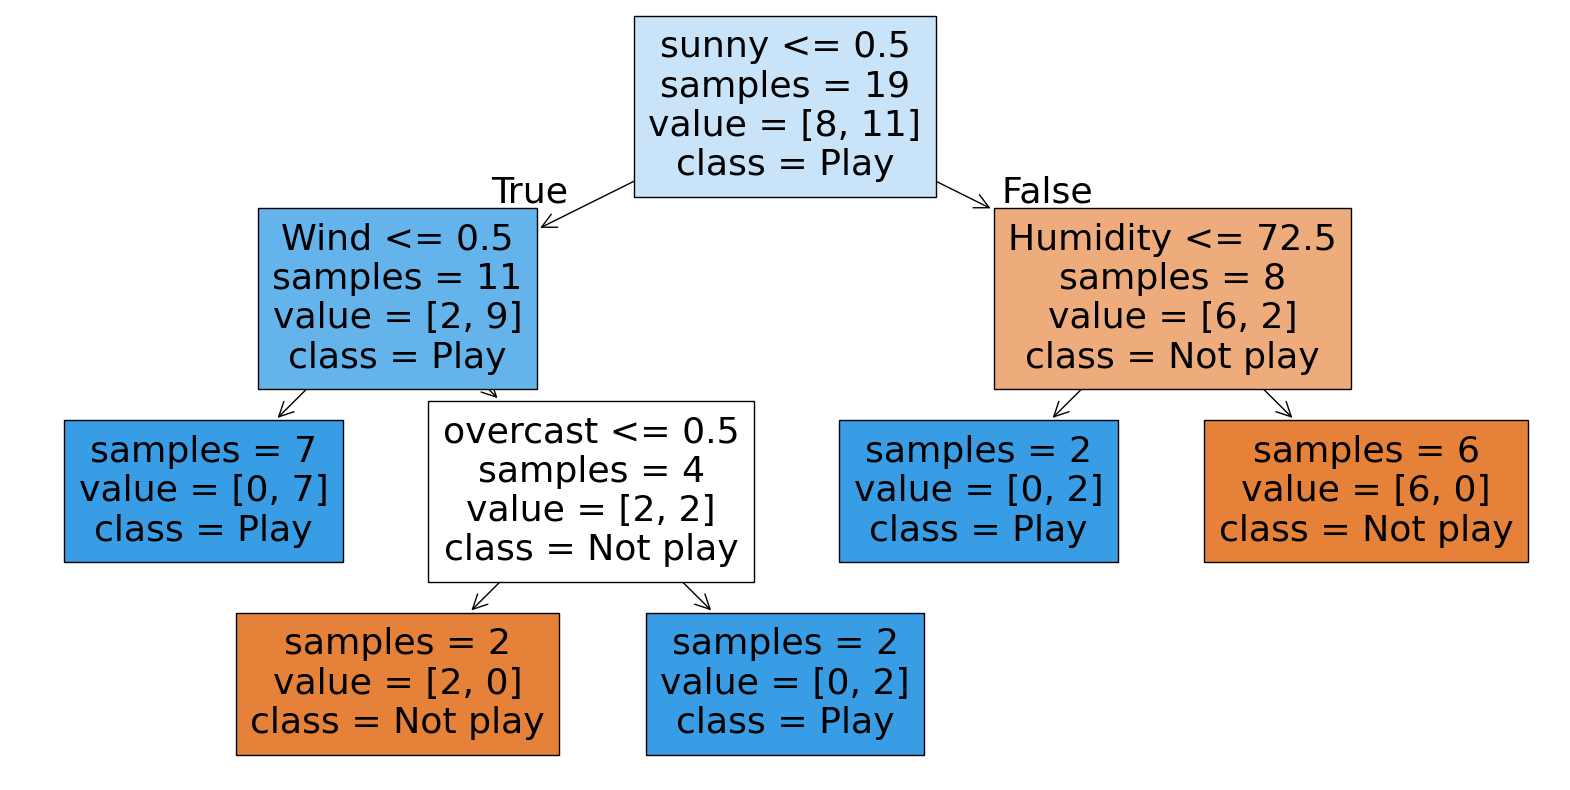

In [12]:
# visualize tree

import matplotlib.pyplot as plt 
from sklearn.tree import plot_tree

plt.figure(figsize=(20,10))
plot_tree(dt_clf,filled=True,feature_names=X.columns,
          class_names=['Not play','Play'],impurity=False)
plt.show()

## Decision Tree Regressor

In [5]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 

dataset_dict = {
    'Outlook': ['sunny', 'sunny', 'overcast', 'rainy', 'rainy', 'rainy', 'overcast', 'sunny', 'sunny', 'rainy', 'sunny', 'overcast', 'overcast', 'rainy', 'sunny', 'overcast', 'rainy', 'sunny', 'sunny', 'rainy', 'overcast', 'rainy', 'sunny', 'overcast', 'sunny', 'overcast', 'rainy', 'overcast'],
    'Temperature': [85.0, 80.0, 83.0, 70.0, 68.0, 65.0, 64.0, 72.0, 69.0, 75.0, 75.0, 72.0, 81.0, 71.0, 81.0, 74.0, 76.0, 78.0, 82.0, 67.0, 85.0, 73.0, 88.0, 77.0, 79.0, 80.0, 66.0, 84.0],
    'Humidity': [85.0, 90.0, 78.0, 96.0, 80.0, 70.0, 65.0, 95.0, 70.0, 80.0, 70.0, 90.0, 75.0, 80.0, 88.0, 92.0, 85.0, 75.0, 92.0, 90.0, 85.0, 88.0, 65.0, 70.0, 60.0, 95.0, 70.0, 78.0],
    'Wind': [False, True, False, False, False, True, True, False, False, False, True, True, False, True, True, False, False, True, False, True, True, False, True, False, False, True, False, False],
    'Num_Players': [52,39,43,37,28,19,43,47,56,33,49,23,42,13,33,29,25,51,41,14,34,29,49,36,57,21,23,41]
}
df = pd.DataFrame(dataset_dict)
print(df)

     Outlook  Temperature  Humidity   Wind  Num_Players
0      sunny         85.0      85.0  False           52
1      sunny         80.0      90.0   True           39
2   overcast         83.0      78.0  False           43
3      rainy         70.0      96.0  False           37
4      rainy         68.0      80.0  False           28
5      rainy         65.0      70.0   True           19
6   overcast         64.0      65.0   True           43
7      sunny         72.0      95.0  False           47
8      sunny         69.0      70.0  False           56
9      rainy         75.0      80.0  False           33
10     sunny         75.0      70.0   True           49
11  overcast         72.0      90.0   True           23
12  overcast         81.0      75.0  False           42
13     rainy         71.0      80.0   True           13
14     sunny         81.0      88.0   True           33
15  overcast         74.0      92.0  False           29
16     rainy         76.0      85.0  False      

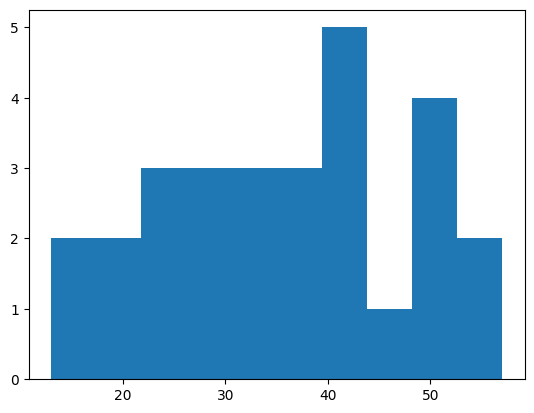

In [6]:
plt.hist(x=df['Num_Players'])
plt.show()

In [7]:
from sklearn.model_selection import train_test_split

# encode the categorical feature 'Outlook'(one-hot encoding)
df = pd.get_dummies(df, columns=['Outlook'],prefix='',prefix_sep='',dtype=int)
# convert the boolean value to int
df['Wind'] = df['Wind'].astype(int)

# Split data into features and target, then into training and test sets
X, y = df.drop(columns='Num_Players'), df['Num_Players']
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.5, shuffle=False)

In [8]:
from sklearn.tree import DecisionTreeRegressor, plot_tree
tree = DecisionTreeRegressor(random_state=42)
# Get the cost complexity path, impurities, and effective alpha
path = tree.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities
pruning_analysis = pd.DataFrame({
    'total_leaf_impurities' : impurities,
    'effective_alpha':ccp_alphas
})
print(pruning_analysis)

    total_leaf_impurities  effective_alpha
0                0.000000         0.000000
1                0.047619         0.023810
2                0.369048         0.321429
3                0.940476         0.571429
4                2.226190         1.285714
5                3.666667         1.440476
6                5.952381         2.285714
7                8.285714         2.333333
8               15.752381         7.466667
9               55.158730        19.703175
10              78.968254        23.809524
11             151.530612        72.562358


In [9]:
# final model
final_tree = DecisionTreeRegressor(random_state=42,ccp_alpha=0.1)
final_tree.fit(X_train,y_train)

DecisionTreeRegressor(ccp_alpha=0.1, random_state=42)

In [10]:
y_pred = final_tree.predict(X_test)
print(y_pred)

[39.         23.         33.         49.         39.         13.
 23.         33.         49.         42.66666667 52.         23.
 28.         42.66666667]


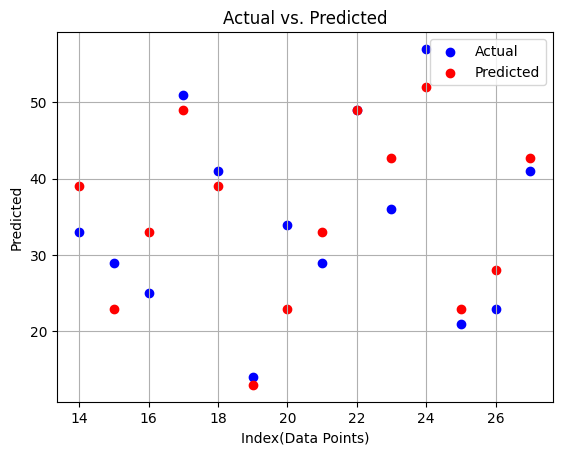

In [11]:
import matplotlib.pyplot as plt

plt.scatter(x=y_test.index,y=y_test,color='blue',label='Actual')
plt.scatter(x=y_test.index,y=y_pred,color='red',label='Predicted')
plt.xlabel("Index(Data Points)")
plt.ylabel("Predicted")
plt.legend()
plt.title("Actual vs. Predicted")
plt.grid(True)
plt.show()

In [12]:
from sklearn.metrics import root_mean_squared_error

print(f'RMSE: {root_mean_squared_error(y_test,y_pred):.4f}')

RMSE: 5.2319


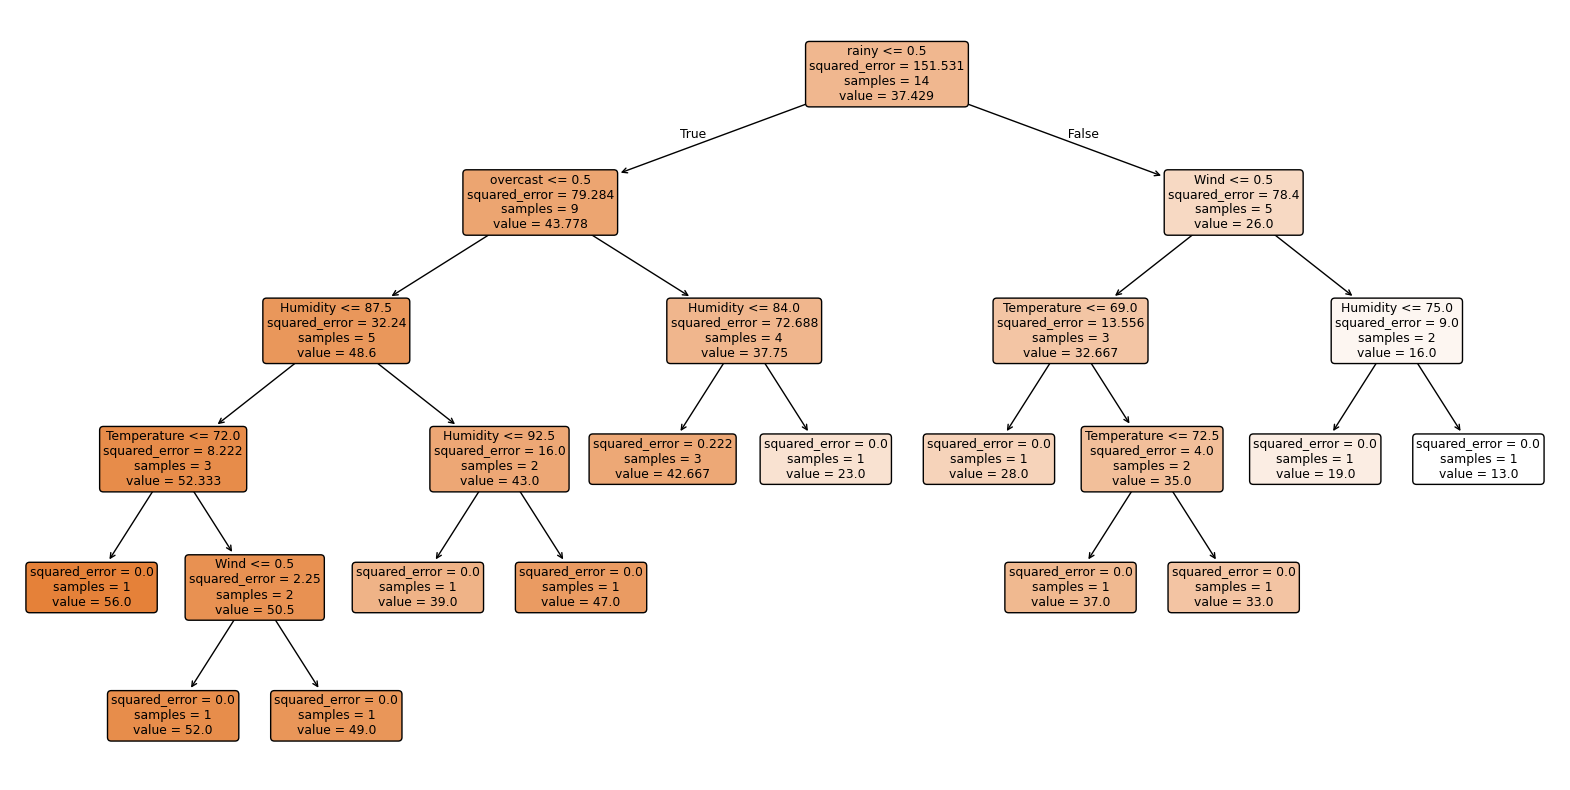

In [14]:
plt.figure(figsize=(20,10))
plot_tree(final_tree,filled=True,feature_names=X.columns,rounded=True,
          impurity=True)
plt.show()

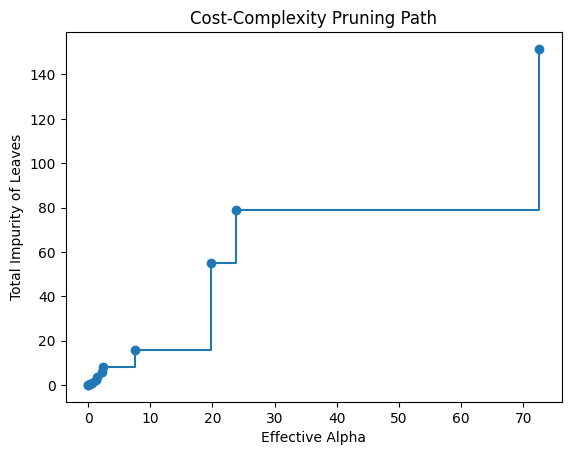

In [21]:
# Plotting alpha vs total impurity
plt.figure()
plt.plot(ccp_alphas, impurities, marker='o', drawstyle="steps-post")
plt.xlabel("Effective Alpha")
plt.ylabel("Total Impurity of Leaves")
plt.title("Cost-Complexity Pruning Path")
plt.show()

#### Choosing the Best ccp_alpha

In [15]:
# 1. Train an  unpruned tree and get the prune path
clf = DecisionTreeRegressor(random_state=42)
path = clf.cost_complexity_pruning_path(X_train,y_train)
ccp_alphas = path.ccp_alphas
print(ccp_alphas)

[0.00000000e+00 2.38095238e-02 3.21428571e-01 5.71428571e-01
 1.28571429e+00 1.44047619e+00 2.28571429e+00 2.33333333e+00
 7.46666667e+00 1.97031746e+01 2.38095238e+01 7.25623583e+01]


In [16]:
# 2. Train a series of pruned trees using each aplha
clfs = []
for alpha in ccp_alphas:
    dt = DecisionTreeRegressor(random_state=42,ccp_alpha=alpha)
    dt.fit(X_train,y_train)
    clfs.append(dt)

In [17]:
# 3. Evaluate models using cross_validation
from sklearn.model_selection import cross_val_score

cv_score = [np.mean(cross_val_score(clf,X_train,y_train,cv=5,scoring='neg_mean_squared_error')) for clf in clfs]
print(cv_score)

[-194.5, -194.5, -192.63333333333335, -192.63333333333335, -185.56666666666666, -185.56666666666666, -185.56666666666666, -185.56666666666666, -197.4951388888889, -203.1695011337868, -239.37320483749053, -297.9523148148149]


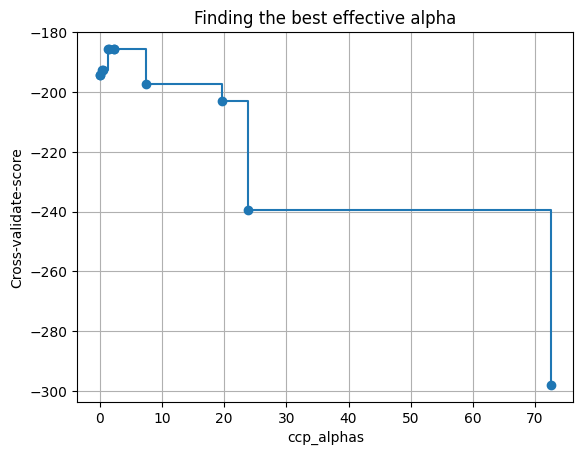

In [18]:
plt.figure()
plt.plot(ccp_alphas,cv_score,marker='o',drawstyle='steps-post')
plt.xlabel('ccp_alphas')
plt.ylabel('Cross-validate-score')
plt.title('Finding the best effective alpha')
plt.grid(True)
plt.show()

In [19]:
best_alpha = ccp_alphas[np.argmax(cv_score)]
print("Best alpha:", best_alpha)

Best alpha: 1.2857142857142858


In [20]:
ccp_alphas

array([0.00000000e+00, 2.38095238e-02, 3.21428571e-01, 5.71428571e-01,
       1.28571429e+00, 1.44047619e+00, 2.28571429e+00, 2.33333333e+00,
       7.46666667e+00, 1.97031746e+01, 2.38095238e+01, 7.25623583e+01])